<a href="https://colab.research.google.com/github/Pataweepr/applyML_vistec_2019/blob/master/Edit_of_hw2_HomeDotTech_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
from sklearn import preprocessing

# HW2: Thailand Real Estate Recommendation using k-NN

The data used here is part of the [Home Hackathon 2018](https://www.homedottech.com/homehackathon-2018/) by courtesy of HomeDotTech. 

[Home.co.th](https://www.home.co.th/) is a website that has the most comprehensive data about real estate in Thailand. It is one of the leading website in Thailand for real estates and has millions of page views per month.

The data we will be using are page view logs from the website, and the properties of housings and condominiums around Thailand.

We would like to use this data to create simple recommendation systems for real estate.

First to get the data go to this [link](https://drive.google.com/file/d/1X-cacRIF30acXyKotSmDZu5qc8Gs84Wm/view?usp=sharing) and click **add to Drive**

We will use this data by linking it with our Google Colab notebook, by using the command below, click the link, and follow the steps to let Google Colab link to your Google Drive by copying the authorization code and pasting it into the space provided.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Now that we have mounted the drive. We can access it by simple linux commands. To use linux commands in Colab, we can use the prefix "!" in front of the command.

The command below unzips the *For_participants.zip* file and list the current directory on the machine that host our Colab.

In [3]:
!unzip '/content/gdrive/My Drive/For_participants.zip'
!ls

Archive:  /content/gdrive/My Drive/For_participants.zip
replace project_facility.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: project_facility.csv    
  inflating: project_main.csv        
  inflating: userLog_201801_201802_for_participants.csv  
adc.json			   project_main.csv
clean-phone-data-for-students.csv  readCsvFile.csv
gdrive				   sample_data
project_facility.csv		   userLog_201801_201802_for_participants.csv


You should notice three files


1.   **project_main.csv** explains each property. The details such as location (latitude, longtitude), price, housing type, build date, etc. are listed here.
2.   **project_facility.csv** explains the facilities in each property. The format for each line is the id of the project follow by the type of the facility (another kind of id). The id for facilities are 

1: swimming pool

2: club house

3: park

4: fitness

5: security

6: playground

3.   **userLog_201801_201802_for_participants.csv** shows the user page views. Each view entry has a user id, the project visited, time, etc. The data is from January 2018 to February 22nd.

You can also read the data dictionary for more information [here](https://drive.google.com/file/d/1uN8lRjoJQ3f-Ui69V5wwWGw13elvvaXq/view?usp=sharing)

The files are in a csv format. **However, the delimiter used is a ';' instead of a ','**.  A sample function for reading the provided files are shown below.

In [0]:
def readDataFromDrive(file_name):
  raw_data = pd.read_csv(file_name,delimiter= ';')
  return raw_data;

# Data exploration and cleaning

## TODO#1: Explore project_main.csv

Read *project_main.csv* and explore the data using pandas.head(), pandas.summary()

What columns do you think are redundant?

**Ans:**

Drop those columns.

We will use only the projects in Bangkok (province_id = 10). Remove the projects outside of Bangkok.

Also, convert possible numbers and text to numbers using *.infer_objects()*

In [5]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main = readDataFromDrive('project_main.csv')
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.infer_objects()
print(project_main.head())
project_main.describe()

(1775, 18)
    project_id  developer_id  brand_id                    project_name_th  \
0           44        140786       0.0                       พาร์ควิลล์ 3   
1           24          1032       0.0                  สัมมากร นิมิตใหม่   
7          208         13323       NaN    ลิฟวิ่งนารา รามคำแหง-สุวรรณภูมิ   
8          228          6772       0.0  เค.ซี.รามอินทรา 5 (พระยาสุเรนทร์)   
11         982         12136     979.0                อนาวิลล์ สุวรรณภูมิ   

                          project_name_en  district_id  province_id  \
0                             Parkville 3       1046.0           10   
1                      Sammakorn Nimitmai       1046.0           10   
7   LIVING NARA RAMKHAMHAENG-SUVARNABHUMI       1011.0           10   
8                         K.C. RAMINTRA 5       1046.0           10   
11                  Anaville Suvarnabhumi       1011.0           10   

          lat         lon  project_land_size_rai  total_unit  \
0   13.891719  100.722099          

,project_id,developer_id,brand_id,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price
count,1775.000000,1775.000000,1634.000000,1775.000000,1775.0,1775.000000,1775.000000,1775.000000,1410.000000,409.00000,1.747000e+03,3.560000e+02
mean,5250.101408,30920.017465,549.782130,1027.505352,10.0,13.763191,100.585419,14.002817,333.246099,53.07176,6.218003e+06,2.328965e+07
std,2430.836876,48471.262302,642.731544,13.689002,0.0,0.071855,0.094610,24.931914,378.833604,37.74896,8.804919e+06,4.808880e+07
min,24.000000,128.000000,0.000000,1001.000000,10.0,13.549172,100.331359,0.000000,3.000000,0.00000,6.300000e+05,7.800000e+02
25%,3282.500000,4966.000000,0.000000,1017.000000,10.0,13.714096,100.533427,1.000000,87.250000,38.00000,2.245000e+06,5.197500e+06
50%,4850.000000,11066.000000,255.000000,1030.000000,10.0,13.749914,100.585228,4.000000,194.500000,48.00000,3.690000e+06,9.000000e+06
75%,7939.500000,17114.500000,1000.750000,1039.000000,10.0,13.812963,100.647869,16.000000,433.000000,70.00000,6.005000e+06,2.000000e+07
max,9536.000000,141036.000000,2280.000000,1050.000000,10.0,13.950830,100.888743,279.000000,2700.000000,236.00000,1.240000e+08,3.670000e+08


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_main = readDataFromDrive('project_main.csv')
project_main = project_main.loc[project_main['province_id'] == 10]
print(project_main.shape)
project_main = project_main.drop(columns=['project_land_size_ngan', 'project_land_size_wa'])
project_main.loc[project_main["project_status"] == "A", "project_status"] = 1
project_main.loc[project_main["project_status"] == "U", "project_status"] = 0
project_main = project_main.infer_objects()
print(project_main.head())
project_main.describe()
        </code>
      </pre>
</details>



## TODO#2: NaN removal

Note how there are many missing values in the data. Remove the projects with no location information (no latitude or longtitude info). Fill the missing starting prices with the mode of the starting price.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main = project_main.dropna(subset=['lat','lon'])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])

<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_main = project_main.dropna(subset=['lat','lon'])
project_main["starting_price"] = project_main["starting_price"].fillna(project_main["starting_price"].mode().iloc[0])
        </code>
      </pre>
</details>

## TODO#3: Explore Project_facility.csv

Check out the file *project_facility.csv*. If we want to describe each project using these information, do you think it is easy to use the information provided as is? Why?

**ans:**


In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_facility = readDataFromDrive('project_facility.csv')

## TODO#4: Change the data into a useable format
Change the data format of project_facility into a table that describe whether a facility has a certain type of facility in binary format (yes/no). Hint: you can use [pd.crosstab](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html) to do this.

In [8]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()

Int64Index([   4,   24,   29,   41,   44,   45,   73,   95,  115,  133,
            ...
            9522, 9524, 9525, 9526, 9527, 9531, 9532, 9534, 9536, 9541],
           dtype='int64', name='project_id', length=5039)


facility_id,1,2,3,4,5,6
project_id,,,,,,
4,1,0,1,1,1,0
24,0,0,1,1,0,1
29,0,0,0,0,1,0
41,1,1,0,1,0,1
44,1,0,1,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = pd.crosstab(project_facility['project_id'], project_facility['facility_id'], rownames=['project_id'], colnames=['facility_id'])
print(project_facility_table.index)
project_facility_table.head()
        </code>
      </pre>
</details>

## TODO#5: Remove missing information that does not exist in both files

We want to use only projects that have facility information. Remove the projects that do not exist in both files. You may find [pandas.DataFrame.isin](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html) useful.

In [9]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()

(1697, 6)
(1697, 16)


facility_id,1,2,3,4,5,6
project_id,,,,,,
24,0,0,1,1,0,1
44,1,0,1,0,0,0
45,0,1,1,1,1,0
95,1,0,0,0,0,0
133,1,0,1,0,1,0


<details>
    <summary>SOLUTION HERE!</summary>
      <pre>
        <code>
project_facility_table = project_facility_table.loc[project_facility_table.index.isin(project_main['project_id'])]
project_main = project_main.loc[project_main['project_id'].isin(project_facility_table.index.astype(int))]
project_main = project_main.sort_values('project_id')
print(project_facility_table.shape)
print(project_main.shape)
project_facility_table.head()
        </code>
      </pre>
</details>

In [10]:
# Double check whether this looks okay
project_main.head()

,project_id,developer_id,brand_id,project_name_th,project_name_en,district_id,province_id,lat,lon,project_land_size_rai,total_unit,percent_car_parking,starting_price,highest_price,project_status,created_at
1,24,1032,0.0,สัมมากร นิมิตใหม่,Sammakorn Nimitmai,1046.0,10,13.876590,100.731927,154,NaN,NaN,4590000.0,NaN,0,2011-02-24T21:43:59.297+0700
0,44,140786,0.0,พาร์ควิลล์ 3,Parkville 3,1046.0,10,13.891719,100.722099,54,NaN,NaN,3500000.0,3862000.0,1,2011-01-14T18:40:12.117+0700
164,45,2840,0.0,พาร์คเวย์ ชาเล่ต์,parkway chalet,1010.0,10,13.803465,100.727406,87,NaN,NaN,5500000.0,NaN,0,2011-03-28T23:27:08.833+0700
172,95,2730,NaN,อารีน่า พาร์ค ชวนชื่น ซิตี้,NaN,1005.0,10,13.859276,100.665287,79,NaN,NaN,2000000.0,5000000.0,0,2007-04-18T23:02:22.000+0700
185,133,6772,538.0,เค.ซี.เลควิว,K.C. LAKEVIEW,1044.0,10,13.759440,100.679230,60,NaN,NaN,11000000.0,NaN,1,2011-01-14T18:42:51.630+0700


In [11]:
# Double check whether this looks okay
project_main.iloc[0]

project_id                                         24
developer_id                                     1032
brand_id                                            0
project_name_th                     สัมมากร นิมิตใหม่
project_name_en                    Sammakorn Nimitmai
district_id                                      1046
province_id                                        10
lat                                           13.8766
lon                                           100.732
project_land_size_rai                             154
total_unit                                        NaN
percent_car_parking                               NaN
starting_price                               4.59e+06
highest_price                                     NaN
project_status                                      0
created_at               2011-02-24T21:43:59.297+0700
Name: 1, dtype: object

## TODO#6: Explore userLog_201801_201802_for_participants.csv

Read the userLog file and look at the data.

How many entries are there?

**Ans:**

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog = readDataFromDrive('userLog_201801_201802_for_participants.csv')

Remove the entries for the projects that we have already removed.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]

<details>
    <summary>SOLUTION HERE!</summary>
    <code>
  userLog = userLog.loc[userLog['project_id'].isin(project_facility_table.index.astype(int))]
  </code>
</details>



## TODO#7: Let's see how often the users visit Home.co.th

To explore the useLog file, we want to see how the users behave.

First we will aggregate the number of times each user visit the site.

Use [pd.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to help count the amount of times each user visit the site.

In [14]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_user = userLog['userCode'].value_counts()
userLog_freq_user_np  = np.array(userLog_freq_user.values)
print(userLog_freq_user_np.shape)
userLog_freq_user.head()

(175127,)


de89bac5-57c6-ecfb-184d-cc4e973c31ac    7408
31bb9bf0-8ad5-3e50-f334-e6c7de89bac5    3465
eec0a125-d5ab-f692-c501-4713c35c756d     703
e400406a-b73d-3e78-d37d-53fcddebccaf     518
1aecd8e5-f02b-ba5c-e865-49da43ad8f22     472
Name: userCode, dtype: int64

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>
  userLog_freq_user = userLog['userCode'].value_counts()
  userLog_freq_user_np  = np.array(userLog_freq_user.values)
  print(userLog_freq_user_np.shape)
  userLog_freq_user.head()
  </code>
  </pre>
</details>




Show a histogram of the view counts per user. Also use *pd.head()* to list the top viewers of this site.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################


## TODO#8: View statistics
Find the mean, median, and mode of the view counts. Also find the 95th percentile of the view counts. Hint: use [np.percentile](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.percentile.html)

**Ans:**

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################


## TODO#9: userLog cleaning

From TODO#7-8, and the fact that this is a log from a 50 day peroid, are there any problems with the data contained in *userLog*? Explain your hypothesis.

**Ans:**

## TODO#10: userLog pruning

Let's prune out the suspicious users. To be safe, we will only **keep users that have more than 4 views and less than 41 views**. We have a minimum cutoff so that we can have better information about the users to train our recommendation system.

You may use [pd.index](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.Index.html)  to help do the filtering.

Check your answer by plotting a histogram of the views after the pruning.

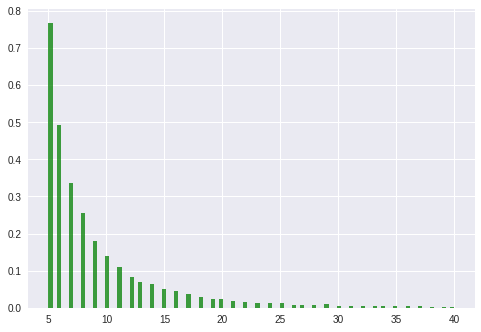

In [15]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user <= 40 ]
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user >= 5 ]
userLog_freq_user_np = np.array(userLog_freq_user.values)

n, bins, patches = plt.hist(userLog_freq_user_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

userLog = userLog.loc[userLog['userCode'].isin(userLog_freq_user.index)]

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>

userLog_freq_user = userLog_freq_user.loc[userLog_freq_user <= 40 ]
userLog_freq_user = userLog_freq_user.loc[userLog_freq_user >= 5 ]
userLog_freq_user_np = np.array(userLog_freq_user.values)

n, bins, patches = plt.hist(userLog_freq_user_np, 100, density=True, facecolor='g', alpha=0.75)
plt.show()

userLog = userLog.loc[userLog['userCode'].isin(userLog_freq_user.index)]
  </code>
  </pre>
</details>



##Optional 

Can you do better userLog filtering by based on daily views instead of total views? For example, a user shouldn't view more than 20 pages within a day, etc.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################

------

#Recommendation system

## TODO#11: Train and test split

We will split the log data into training and test set for our recommendation system.

For the training set, we will use the days between 15-18 February.
For the testing set, we will use the days between 19-22 February.

Filter the userLog dataframe using the criterion, and create two dataframes:
*userLog_train* and *userLog_test*.

In [17]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])

userLog_last_month  = userLog.loc[userLog['month'] == 2]
userLog_train = userLog_last_month.loc[ userLog_last_month['day'] >=15]
userLog_train = userLog_train.loc[ userLog_train['day'] < 19]
userLog_test = userLog_last_month.loc[ userLog_last_month['day'] >= 19]

print(userLog_train.shape)
print(userLog_test.shape)

userLog_freq_day.head()

(12135, 9)
(13295, 9)


year                                 2018                             ...     \
month                                   1                             ...  2   
day                                    1  2  3  4  5  6   7  8  9  10 ... 13   
userCode                                                              ...      
0004e7c4-d920-9891-be82-259a684c12cd    0  0  0  0  0  0   0  0  0  0 ...  0   
000a0872-72e2-b1b9-bfe3-3b9e173c516b    0  0  0  0  0  0   0  0  0  0 ...  0   
0010f747-c339-58fc-5a1a-2d2b142d0ef8    0  0  0  0  0  0  10  0  0  0 ...  0   
00111011-ec7f-b5d8-4a2c-ebbe6f939e27    0  0  0  0  0  0   0  0  0  0 ...  0   
0014ce7f-5b12-b752-dd02-4cffd1cecaae    0  0  0  0  0  0   0  0  0  0 ...  0   

year                                                             
month                                                            
day                                  14 15 16 17 18 19 20 21 22  
userCode                                                         
0004e7c4-d920-9891-be82-259a684c12cd  0  0  0  0  0  0  0  0  0  
000a0872-72e2-b1b9-bfe3-3b9e173c516b  0  0  0  0  8  0  0  0  0  
0010f747-c339-58fc-5a1a-2d2b142d0ef8  0  0  0  0  0  0  0  0  0  
00111011-ec7f-b5d8-4a2c-ebbe6f939e27  0  0  0  0  0  0  0  0  0  
0014ce7f-5b12-b752-dd02-4cffd1cecaae  0  0  0  0  0  0  0  0  0  

[5 rows x 53 columns]

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])

userLog_last_month  = userLog.loc[userLog['month'] == 2]
userLog_train = userLog_last_month.loc[ userLog_last_month['day'] >=15]
userLog_train = userLog_train.loc[ userLog_train['day'] < 19]
userLog_test = userLog_last_month.loc[ userLog_last_month['day'] >= 19]

print(userLog_train.shape)
print(userLog_test.shape)

userLog_freq_day.head()
</code>
</pre>
</details>







## TODO#12: Format the train and test data
Create a dataframe as specified below. Hint: use pd.crosstab

In [18]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
# Create freq_user_seen_proj_train: a dataframe that has
# User id as rows
# Project id as columns (the value is the number of visits for that user)
# using the training data

freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()

(2338, 1162)


project_id,44,45,133,189,208,228,234,235,253,287,...,9403,9418,9419,9420,9422,9424,9446,9468,9471,9478
userCode,,,,,,,,,,,,,,,,,,,,,
000a0872-72e2-b1b9-bfe3-3b9e173c516b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0016878a-2b0e-647a-efa1-772fc5873c7d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001efb31-8833-bb1a-b2b3-8e3af720e7f7,0,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0035bcd3-d7c5-1362-3c47-638c3567a370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003e4075-3058-b8db-915c-c2bdefa3d11a,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
print(freq_user_seen_proj_train_np.shape)

freq_user_seen_proj_train.head()
</code>
</pre>
</details>



In [19]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
# Create freq_user_seen_proj_test: a dataframe that has
# User id as rows
# Project id as columns (the value is the number of visits for that user)
# using the test data

freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test = freq_user_seen_proj_test.iloc[freq_user_seen_proj_test.index.isin(freq_user_seen_proj_train.index)]
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()

(642, 1190)


project_id,44,156,228,234,235,253,287,291,314,459,...,9420,9422,9424,9446,9471,9478,9483,9484,9491,9493
userCode,,,,,,,,,,,,,,,,,,,,,
0066d2b6-9b4f-db2c-39be-f24251e4ca9f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
008cb7e4-ed2c-9765-20cb-715cbfd3f920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00d84457-06b6-d1b6-2292-a661e83def6e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00faf503-f097-fda5-4c2a-02c2cb3be468,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01609e98-4aa1-40a6-cb62-5cfa8478f7e4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
print(freq_user_seen_proj_test_np.shape)

freq_user_seen_proj_test.head()
</code>
</pre>
</details>




## TODO#13:  Normalize the data

In machine learning, we usually normalize the data before putting it into a machine learning model. If we do not normalize the data, the model usually latches onto the feature with highest variance.

For example, consider the following projects:


```
           lat  lon   price
Project A: 13.0 100.2 4000000
Project B: 14.0 105.3 4500000
Project C: 13.1 100.1 5000000
```

If we compute the Euclidean distance between each projects. Project A will be closer to project B than project C, even though project A and C lies within the same region.

Thus, we usually scale (or in machine learning jargon, normalize) each input feature to be in the same range.

We can either do **min-max scaling** (scale the min to 0 and max to 1), **standardization** (scale the input to have 0 mean and std of 1), etc, depending on the type of data. We use min-max scaling for features we believe have a limited range, and vice versa.

Create a function *normalize(x)* that takes in a numpy array *x* and normalize it to 0 and 1. You may find [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html?fbclid=IwAR3jCj2F4T1qZqgqwM-rYSlLC_WymKPa4tF4DYk5AfcwlIL0cyiIdi4VMpA#preprocessing-scaler) helpful.

Note that when we have training and test data, we have to normalize by the statistics in the training data, and then apply those statistics to the test data as well. However, for this particular lab we do not have to scale the features from the test data.

In [0]:
def normalize(x):
  ################################################################################
  #                            WRITE YOUR CODE BELOW                             #
  ################################################################################
  norm_lizer = preprocessing.MinMaxScaler().fit(x)
  return norm_lizer


In [21]:
# Test the function here.
# where each row is one data entry
# each column represents each feature value
x = np.array([[1.0,2.0,3.0,5.0],[4.0,5.0,6.0,5.0],[3.0,1.0,9.0,5.0]])
norm_lizer = normalize(x)
print(norm_lizer.transform(x))
# You should get the following
#[[0.         0.25       0.         0.        ]
# [1.         1.         0.5        0.        ]
# [0.66666667 0.         1.         0.        ]]

[[0.         0.25       0.         0.        ]
 [1.         1.         0.5        0.        ]
 [0.66666667 0.         1.         0.        ]]


## Recommendation system using k-Nearest Neighbors

We will use k-NN to create a recommendation systems. Given a new user, find the most similar user, and recommend that new user with the projects the most similar user visted.

To do this, we have to answer the two questions, **how do we define a user, and how do we quantify similarity between users**.

We can answer the first question by defining features that represents each user, and we can answer the second question by defining distance metrics to be used with k-NN.

For the following part of this lab, we will define a user using the average of properties of the project he/she visted.





## Recommendation using user features

### TODO#14:  user feature creation

Write a function that takes

1) UserLog_data_frame: the dataFrame containing the userLog from the training set

2) user_code: the user ids to create the feature for ( e.g. freq_user_seen_proj_train.index )

and returns

np_data: a np array that each row corresponds to each user_code, with the columns containing the average of the features calculated from the project visted

The features include


*   Latitude
*   Longtitude
*   Starting Price
*   Facilities

In [0]:
def feature_sel(userLog_data_frame,user_code):
  np_data = np.zeros((user_code.shape[0], 3 + project_facility_table.shape[1]))

  for i in np.arange(user_code.shape[0]):
    user_sel = user_code[i]
    if np.sum(userLog_data_frame['userCode'].isin([user_sel])) == 0:
      print(i,' : ', user_sel)
    userLog_dataF_sel = userLog_data_frame.loc[userLog_data_frame['userCode'] == user_sel]
    proj_id_sel = userLog_dataF_sel['project_id'].values
    input_np_data = np.zeros((proj_id_sel.shape[0],3 + project_facility_table.shape[1]))
    for j in np.arange(proj_id_sel.shape[0]):
      user_proj_far = project_facility_table.loc[project_facility_table.index == proj_id_sel[j]]
      user_proj_main = project_main.loc[project_main['project_id'] == proj_id_sel[j]]
      input_np_data[j,:] = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
  ################################################################################
  #                            WRITE YOUR CODE BELOW                             #
  ################################################################################
    # Compute the mean in input_np_data and put it in np_data, be careful with the axis
    np_data[i,:] = np.mean(input_np_data,axis=0)
  return np_data;

In [23]:
# Test the function on a small subset of user_code first
project_main_np_data_tmp = feature_sel(userLog_train,freq_user_seen_proj_train.index[:10])
print(project_main_np_data_tmp)

[[1.37550369e+01 1.00566334e+02 3.93500000e+06 1.00000000e+00
  3.75000000e-01 3.75000000e-01 1.00000000e+00 1.00000000e+00
  2.50000000e-01]
 [1.36507804e+01 1.00640633e+02 3.41500000e+06 1.00000000e+00
  0.00000000e+00 1.00000000e+00 5.00000000e-01 1.00000000e+00
  0.00000000e+00]
 [1.37862810e+01 1.00746338e+02 3.94700000e+06 7.00000000e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.37158766e+01 1.00472114e+02 1.75000000e+06 1.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.37690403e+01 1.00716885e+02 4.99600000e+06 6.00000000e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.38682246e+01 1.00853397e+02 2.56333333e+06 0.00000000e+00
  3.33333333e-01 6.66666667e-01 6.66666667e-01 1.00000000e+00
  0.00000000e+00]
 [1.38518590e+01 1.00656169e+02 9.00000000e+06 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00]
 [1.37

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
def feature_sel(userLog_data_frame,user_code):
  np_data = np.zeros((user_code.shape[0], 3 + project_facility_table.shape[1]))
  
  for i in np.arange(user_code.shape[0]):
    user_sel = user_code[i]
    #print(user_sel)
    userLog_dataF_sel = userLog_data_frame.loc[userLog_data_frame['userCode'] == user_sel]
    proj_id_sel = userLog_dataF_sel['project_id'].values
    input_np_data = np.zeros((proj_id_sel.shape[0],3 + project_facility_table.shape[1]))
    # print(proj_id_sel)
    for j in np.arange(proj_id_sel.shape[0]):
      user_proj_far = project_facility_table.loc[project_facility_table.index == proj_id_sel[j]]
      user_proj_main = project_main.loc[project_main['project_id'] == proj_id_sel[j]]
      input_np_data[j,:] = np.hstack(( np.array(user_proj_main[["lat","lon","starting_price"]].values) ,  np.array(user_proj_far.values) ))
    np_data[i,:] = np.mean(input_np_data,axis=0)
  return np_data;
</code>
</pre>
</details>



### TODO#15: create the training features

Use *feature_sel()* and *normalize()* from above to create training features. This does take a while to run.

In [24]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main_np_data_train =feature_sel(userLog_train,freq_user_seen_proj_train.index)
norm_er_proj_main = normalize(project_main_np_data_train)
project_main_np_data_nor = norm_er_proj_main.transform(project_main_np_data_train)
print(project_main_np_data_nor.shape)

(2338, 9)


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
project_main_np_data_nor = feature_sel(userLog_train,freq_user_seen_proj_train.index)
project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor.shape)
</code>
</pre>
</details>



###TODO#16: perform nearest neighbors
Create a k-nn model using sk-learn. See [Nearest Neighbors example](https://scikit-learn.org/stable/modules/neighbors.html) for how to use it.

Use *n_neighbors = 5* and *algorithm = 'ball_tree'* for the k-nn setting. Ball tree is one of the methods to make k-NN faster.

Calculate the nearest neighbors of the data in the training set.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor)
distances, indices = nbrs_proj.kneighbors(project_main_np_data_nor)

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_nor)
distances, indices = nbrs_proj.kneighbors(project_main_np_data_nor)
</code>
</pre>
</details>

## Evaluation 

We will be using [Mean Average Precision](http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html?fbclid=IwAR2UOfz0a_2Ig60aQ2HszgZq63nch96Hbzod2q54kDZRZT_mPzdsxJXyPj0) to evaluate our performance. 

The task is to recommend **projects that the user have not seen before.** Thus, we need to prune out the projects that the users had already seen in the training set.

To do so, we need to create a recommendation list from our k-NN results. We will use the following functions:

1.   proj_seen: create a dictionary of projects viewed by user
    *   data_freq_seen (input): df of frequence of views by user in our case freq_user_seen_proj_train or freq_user_seen_proj_test
    *   output: dictionary of projects viewed by user. {userid: list of project ids}
2.   index_to_usercode: create a dictionary of usercode from nearest neighbor indices
    *   nn_index (input): output from k-NN (indices)
    *   user_code_list (input): list of user id, i.e. freq_user_seen_proj_train.index
    *   output :  dict of user id to nearest user ids. {userid: list of userids}
3.   proj_recommend: create the recommendation list
    *   nn_dict (input): output of index_to_usercode
    *   dict_seen_train (input): output of proj_seen from freq_user_seen_proj_train (training set)
    *   output: dict of recommended list for each user (contains old entries)
4.   proj_repeat: prune out the projects that the users had already seen
    *   dict_train (input): dict from training (output from proj_seen) 
    *   dict_test (input): dict from testing (output from proj_seen or proj_recommend)
    *   output: dict_test that has the projects in dict_train removed
5.   mean_average_precision: find MAP@k
    *   dict_recommend (input): dict of recommendations (only new items)
    *   dict_test (input): dict of ground truths (only new items)
    *   k (input): parameter for MAP@k
    *   output: MAP@k value


In [0]:
def proj_recommend(nn_dict,dict_seen_train):
  nn_proj = {}
  for user_code_nn in nn_dict:
    list_proj = []
    for user_in_list in nn_dict[user_code_nn]:
      list_proj = list_proj + list(dict_seen_train[user_in_list])
    nn_proj[user_code_nn] = list_proj
  return nn_proj

####################################################################

def index_to_usercode(nn_index,user_code_list,user_rec):
  nn_dict = {}
  for i in np.arange(nn_index.shape[0]):
    nn_list = []
    nn_name = user_rec[i]
    for j in np.arange(nn_index.shape[1]):
      ind = nn_index[i][j]
      nn_list.append(user_code_list[ind])
    nn_dict[nn_name] = nn_list
  return nn_dict

####################################################################

def proj_repeat_out(dict_train,dict_test):
  dict_out = {} 
  for user_code in dict_test:
    list_proj_train = np.array(dict_train[user_code])
    list_proj_test = np.array(dict_test[user_code])
    bool_list = np.isin(list_proj_test ,list_proj_train)
    dict_out[user_code] = list(list_proj_test[~bool_list])
  return dict_out

####################################################################

def proj_seen(data_freq_seen):
  all_colums = data_freq_seen.columns
  all_index = data_freq_seen.index
  output_list = {}
  for index in np.arange(len(all_index)):
    np_array = np.array(data_freq_seen.iloc[index])
    output_list[all_index[index]] = all_colums[np_array > 0].values
  return output_list

####################################################################

def mean_average_precision(dict_recomment,dict_test,k):
  list_map_at_k = []
  for user_code in dict_test:
    if user_code in dict_recomment:
      list_map_at_k_user_i = []
      list_proj_rec = np.array(dict_recomment[user_code])
      list_proj_test = np.array(dict_test[user_code])

      ##########

      for i in np.arange(k):
        if(i == len(list_proj_rec) or len(list_proj_test) == 0 or len(list_proj_rec) == 0):
          break
        bool_list = np.isin(list_proj_rec[0:i+1],list_proj_test)
        list_map_at_k_user_i.append(np.sum(bool_list)/(i+1))

      ##########
      # if fail   
      if len(list_map_at_k_user_i) == 0:
        if len(list_proj_test) != 0:
          list_map_at_k_user_i.append(0)


      if len(list_map_at_k_user_i) != 0:
        number = np.mean(np.array(list_map_at_k_user_i))
        list_map_at_k.append(number)

  return np.mean(np.array(list_map_at_k))

In [27]:
# Create the groundtruth and the recommendation list

dict_user_test = proj_seen(freq_user_seen_proj_test)
dict_user_train = proj_seen(freq_user_seen_proj_train)
dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

nn_dict_rec = index_to_usercode(indices,freq_user_seen_proj_train.index,freq_user_seen_proj_train.index)

dict_user_rec = proj_recommend(nn_dict_rec,dict_user_train)
dict_user_rec = proj_repeat_out(dict_user_train,dict_user_rec)

#################################################################

k = 3
map_k = mean_average_precision(dict_user_rec,dict_user_test,k)
print('Your MAP@k result : ', map_k)

Your MAP@k result :  0.0177522349936143


You should get 0.027203065134099615.

## Recommendation using views (collaborative filtering)

### TODO#14:  number of views matrix creation

Create a np matrix that contains the view for each user-project pair, normalize,a nd then create a k-nn recommender

In [28]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
norm_er_freq = normalize(freq_user_seen_proj_train_np)
freq_user_seen_proj_train_nor = norm_er_freq.transform(freq_user_seen_proj_train_np)
nbrs_user_numberical = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(freq_user_seen_proj_train_nor) 
distances, indices = nbrs_user_numberical.kneighbors(freq_user_seen_proj_train_nor)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
  <code>
  freq_user_seen_proj_train_nor = normalize(freq_user_seen_proj_train_np) 
  nbrs_user_numberical = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(freq_user_seen_proj_train_nor) 
  distances, indices = nbrs_user_numberical.kneighbors(freq_user_seen_proj_train_nor)
  </code>
  </pre>
</details>




Evaluate the recommendation just like the case for user feature.

In [29]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
dict_user_test = proj_seen(freq_user_seen_proj_test)
dict_user_train = proj_seen(freq_user_seen_proj_train)
dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

nn_dict_rec = index_to_usercode(indices,freq_user_seen_proj_train.index,freq_user_seen_proj_train.index)

dict_user_rec = proj_recommend(nn_dict_rec,dict_user_train)
dict_user_rec = proj_repeat_out(dict_user_train,dict_user_rec)

#################################################################

k = 3
map_k = mean_average_precision(dict_user_rec,dict_user_test,k)
print('Your MAP@k result : ', map_k)

Your MAP@k result :  0.028544061302681997


### TODO#15:  binary view matrix creation

There are many ways to create user-project view matrix. Previously, we use the amount of views. However, we can also use a binary representation that signifies whether a user had view a project or not.

Repeat the previous steps to create a k-NN recommender. Be sure to use **Jaccard** distance which is better suited for binary features. For more information about Jaccard distance see [distance function](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric).

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
nbrs_user = NearestNeighbors(n_neighbors= 5, algorithm='auto',metric='jaccard' ).fit(freq_user_seen_proj_train_np > 0 )
distances, indices = nbrs_user.kneighbors(freq_user_seen_proj_train_np > 0)

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
nbrs_user = NearestNeighbors(n_neighbors= 5, algorithm='auto',metric='jaccard' ).fit(freq_user_seen_proj_train_np >= 1)
distances, indices = nbrs_user.kneighbors(freq_user_seen_proj_train_np >= 1)
</code>
</pre>
</details>




Evaluate the recommendation just like the case for user feature.

In [31]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
dict_user_test = proj_seen(freq_user_seen_proj_test)
dict_user_train = proj_seen(freq_user_seen_proj_train)
dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

nn_dict_rec = index_to_usercode(indices,freq_user_seen_proj_train.index,freq_user_seen_proj_train.index)

dict_user_rec = proj_recommend(nn_dict_rec,dict_user_train)
dict_user_rec = proj_repeat_out(dict_user_train,dict_user_rec)

#################################################################

k = 3
map_k = mean_average_precision(dict_user_rec,dict_user_test,k)
print('Your MAP@k result : ', map_k)

Your MAP@k result :  0.027203065134099615


You should get the following numbers for MAP@3

**user-profile feature**                          0.0177522349936143

**number of views matrix feature**    0.028544061302681997

**binary view matrix feature**              0.027203065134099615



---

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
project_main_np_data_train = feature_sel(userLog_train,freq_user_seen_proj_train.index)

<details>
    <summary>SOLUTION HERE!</summary>
  <pre>
<code>
project_main_np_data_nor = feature_sel(userLog_train,freq_user_seen_proj_train.index)
project_main_np_data_nor = normalize(project_main_np_data_nor)
print(project_main_np_data_nor.shape)
</code>
</pre>
</details>



###TODO#16: perform nearest neighbors
Create a k-nn model using sk-learn. See [Nearest Neighbors example](https://scikit-learn.org/stable/modules/neighbors.html) for how to use it.

Use *n_neighbors = 5* and *algorithm = 'ball_tree'* for the k-nn setting. Ball tree is one of the methods to make k-NN faster.

Calculate the nearest neighbors of the data in the training set.

In [0]:
################################################################################
#                            WRITE YOUR CODE BELOW                             #
################################################################################
nbrs_proj = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(project_main_np_data_train)
distances, indices = nbrs_proj.kneighbors(project_main_np_data_train)

In [34]:
dict_user_test = proj_seen(freq_user_seen_proj_test)
dict_user_train = proj_seen(freq_user_seen_proj_train)
dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

nn_dict_rec = index_to_usercode(indices,freq_user_seen_proj_train.index,freq_user_seen_proj_train.index)

dict_user_rec = proj_recommend(nn_dict_rec,dict_user_train)
dict_user_rec = proj_repeat_out(dict_user_train,dict_user_rec)

#################################################################

k = 3
map_k = mean_average_precision(dict_user_rec,dict_user_test,k)
print('Your MAP@k result : ', map_k)

Your MAP@k result :  0.010089399744572158


----
#train test val split

เราจะเป็นว่า มี hyper parameter k ที่ในแต่ละโจทย์ตั้งออกมา เป็น 5 แต่ว่าเราไม่รู้ว่ามันเป็น hyper parameter ที่ดีที่สุดหรือไม่ แยก val และ test set เพื่อ หา

In [0]:
# from sklearn.model_selection import train_test_split

In [36]:
from IPython.display import display

userLog_freq_day = pd.crosstab(userLog['userCode'], [userLog['year'], userLog['month'], userLog['day']], rownames =['userCode'], colnames=['year','month','day'])

#display(userLog_freq_day.head())

userLog_last_month  = userLog.loc[userLog['month'] == 2]
userLog_train = userLog_last_month.loc[ userLog_last_month['day'] < 15]
userLog_val = userLog_last_month.loc[ userLog_last_month['day'] >=15]
userLog_val = userLog_val.loc[ userLog_val['day'] < 19]
userLog_test = userLog_last_month.loc[ userLog_last_month['day'] >= 19]

display(userLog_train.shape)
display(userLog_val.shape)
display(userLog_test.shape)


(44382, 9)

(12135, 9)

(13295, 9)

In [37]:

freq_user_seen_proj_train = pd.crosstab(userLog_train['userCode'], userLog_train['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_train_np = np.array(freq_user_seen_proj_train.values)
display(freq_user_seen_proj_train_np.shape)
#display(freq_user_seen_proj_train.head())

freq_user_seen_proj_val = pd.crosstab(userLog_val['userCode'], userLog_val['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_val = freq_user_seen_proj_val.iloc[freq_user_seen_proj_val.index.isin(freq_user_seen_proj_train.index)]
freq_user_seen_proj_val_np = np.array(freq_user_seen_proj_val.values)
display(freq_user_seen_proj_val_np.shape)
#display(freq_user_seen_proj_val.head())

freq_user_seen_proj_test = pd.crosstab(userLog_test['userCode'], userLog_test['project_id'], rownames=['userCode'], colnames=['project_id'])
freq_user_seen_proj_test = freq_user_seen_proj_test.iloc[freq_user_seen_proj_test.index.isin(freq_user_seen_proj_train.index)]
freq_user_seen_proj_test_np = np.array(freq_user_seen_proj_test.values)
display(freq_user_seen_proj_test_np.shape)
#display(freq_user_seen_proj_test.head())

(6614, 1438)

(1110, 1162)

(845, 1190)

### ใช้ feature ตามของแต่ละสถานที่

In [38]:
project_main_np_data_train =feature_sel(userLog_train,freq_user_seen_proj_train.index)
norm_er_proj_main = normalize(project_main_np_data_train)
project_main_np_data_train_nor = norm_er_proj_main.transform(project_main_np_data_train)
print('#####################################################################################')
project_main_np_data_val =feature_sel(userLog_train,freq_user_seen_proj_val.index)
project_main_np_data_val_nor = norm_er_proj_main.transform(project_main_np_data_val)
print('#####################################################################################')
project_main_np_data_test =feature_sel(userLog_train,freq_user_seen_proj_test.index)
project_main_np_data_test_nor = norm_er_proj_main.transform(project_main_np_data_test)
print('#####################################################################################')
num_total_neighbor = 10 

nbrs_proj = {}
dict_rec_proj_main_val = {}
dict_rec_proj_main_test = {}

map_k_proj_val =[]
map_k_proj_test = []


for num_nb in np.arange(2,num_total_neighbor):
  
  nbrs_proj[num_nb] = NearestNeighbors(n_neighbors = num_nb , algorithm='ball_tree').fit(project_main_np_data_train_nor)
  distances_val, indices_val = nbrs_proj[num_nb].kneighbors(project_main_np_data_val_nor)
  distances_test, indices_test = nbrs_proj[num_nb].kneighbors(project_main_np_data_test_nor)
  
  print('----------------------------------- val set -----------------------------------')

  dict_user_val = proj_seen(freq_user_seen_proj_val)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_val = proj_repeat_out(dict_user_train,dict_user_val)

  nn_dict_rec_val = index_to_usercode(indices_val,freq_user_seen_proj_train.index,freq_user_seen_proj_val.index)

  dict_user_rec_val = proj_recommend(nn_dict_rec_val,dict_user_train)
  dict_user_rec_val = proj_repeat_out(dict_user_train,dict_user_rec_val)
  
  dict_rec_proj_main_val[num_nb] = dict_user_rec_val
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_val,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_proj_val.append(map_k)
  
  print('----------------------------------- test set -----------------------------------')
  
  dict_user_test = proj_seen(freq_user_seen_proj_test)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

  nn_dict_rec_test = index_to_usercode(indices_test,freq_user_seen_proj_train.index,freq_user_seen_proj_test.index)

  dict_user_rec_test = proj_recommend(nn_dict_rec_test,dict_user_train)
  dict_user_rec_test = proj_repeat_out(dict_user_train,dict_user_rec_test)
  
  dict_rec_proj_main_test[num_nb] = dict_user_rec_test
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_test,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_proj_test.append(map_k)
  

#####################################################################################
#####################################################################################
#####################################################################################
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.012549235680209655
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.007295123177476119
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.015595031498648992
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.008861000240552062
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.019590991878411988
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.015102231775901245
-------

In [39]:
map_k_proj_val = np.array(map_k_proj_val)
map_k_proj_test = np.array(map_k_proj_test)

print('val set : k = ',np.argmax(map_k_proj_val)+2)
print('test set : k = ',np.argmax(map_k_proj_test)+2)

[0.012549235680209655, 0.015595031498648992, 0.019590991878411988, 0.020474759723406583, 0.021327952796506663, 0.021072387674672177, 0.023228824592222124, 0.023357229037434316]
[0.007295123177476119, 0.008861000240552062, 0.015102231775901245, 0.01645011850894204, 0.01687882845445871, 0.017853709147476658, 0.022508628807648416, 0.023688441188441187]


In [40]:
project_main_np_data_train =feature_sel(userLog_train,freq_user_seen_proj_train.index)
norm_er_proj_main = normalize(project_main_np_data_test_nor)
project_main_np_data_train_nor = norm_er_proj_main.transform(project_main_np_data_train)

project_main_np_data_val =feature_sel(userLog_train,freq_user_seen_proj_val.index)
project_main_np_data_val_nor = norm_er_proj_main.transform(project_main_np_data_val)

project_main_np_data_test =feature_sel(userLog_train,freq_user_seen_proj_test.index)
project_main_np_data_test_nor = norm_er_proj_main.transform(project_main_np_data_test)

num_total_neighbor = 10 

nbrs_freq = {}
dict_rec_freq_val = {}
dict_rec_freq_test = {}

map_k_freq_val =[]
map_k_freq_test = []

for num_nb in np.arange(2,num_total_neighbor):
  
  nbrs_freq[num_nb] = NearestNeighbors(n_neighbors = num_nb , algorithm='ball_tree').fit(project_main_np_data_nor)
  distances_val, indices_val = nbrs_freq[num_nb].kneighbors(project_main_np_data_val)
  distances_test, indices_test = nbrs_freq[num_nb].kneighbors(project_main_np_data_test)
  
  print('----------------------------------- val set -----------------------------------')

  dict_user_val = proj_seen(freq_user_seen_proj_val)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_val = proj_repeat_out(dict_user_train,dict_user_val)

  nn_dict_rec_val = index_to_usercode(indices_val,freq_user_seen_proj_train.index,freq_user_seen_proj_val.index)

  dict_user_rec_val = proj_recommend(nn_dict_rec_val,dict_user_train)
  dict_user_rec_val = proj_repeat_out(dict_user_train,dict_user_rec_val)
  
  dict_rec_freq_val[num_nb] = dict_user_rec_val
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_val,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_freq_val.append(map_k)
  
  print('----------------------------------- test set -----------------------------------')
  
  dict_user_test = proj_seen(freq_user_seen_proj_test)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

  nn_dict_rec_val = index_to_usercode(indices_val,freq_user_seen_proj_train.index,freq_user_seen_proj_val.index)

  dict_user_rec_test = proj_recommend(nn_dict_rec_test,dict_user_train)
  dict_user_rec_test = proj_repeat_out(dict_user_train,dict_user_rec_test)
  
  dict_rec_freq_test[num_nb] = dict_user_rec_test
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_test,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_freq_test.append(map_k)

----------------------------------- val set -----------------------------------
Your MAP@k result :  0.006751309955663039
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.0026157793942961213
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.007576630007101591
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.007576630007101591
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
-------------------

In [44]:
map_k_freq_val = np.array(map_k_freq_val)
map_k_freq_test = np.array(map_k_freq_test)

print('val set : k = ',np.argmax(map_k_freq_val)+2)
print('test set : k = ',np.argmax(map_k_freq_test)+2)

val set : k =  4
test set : k =  2


In [42]:

project_main_np_data_train =feature_sel(userLog_train,freq_user_seen_proj_train.index)
norm_er_proj_main = normalize(project_main_np_data_train)
project_main_np_data_train_nor = norm_er_proj_main.transform(project_main_np_data_train)

project_main_np_data_val =feature_sel(userLog_train,freq_user_seen_proj_val.index)
project_main_np_data_val_nor = norm_er_proj_main.transform(project_main_np_data_val)

project_main_np_data_test =feature_sel(userLog_train,freq_user_seen_proj_test.index)
project_main_np_data_test_nor = norm_er_proj_main.transform(project_main_np_data_test)

num_total_neighbor = 10 

nbrs_seen = {}
dict_rec_seen_val = {}
dict_rec_seen_test = {}

map_k_seen_val =[]
map_k_seen_test = []

for num_nb in np.arange(2,num_total_neighbor):
  
  nbrs_seen[num_nb] = NearestNeighbors(n_neighbors = num_nb , algorithm='ball_tree').fit(project_main_np_data_nor)
  distances_val, indices_val = nbrs_seen[num_nb].kneighbors(project_main_np_data_val)
  distances_test, indices_test = nbrs_seen[num_nb].kneighbors(project_main_np_data_test)
  
  print('----------------------------------- val set -----------------------------------')

  dict_user_val = proj_seen(freq_user_seen_proj_val)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_val = proj_repeat_out(dict_user_train,dict_user_val)

  nn_dict_rec_val = index_to_usercode(indices_val,freq_user_seen_proj_train.index,freq_user_seen_proj_val.index)

  dict_user_rec_val = proj_recommend(nn_dict_rec_val,dict_user_train)
  dict_user_rec_val = proj_repeat_out(dict_user_train,dict_user_rec_val)
  
  dict_rec_seen_val[num_nb] = dict_user_rec_val
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_val,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_seen_val.append(map_k)
  
  print('----------------------------------- test set -----------------------------------')
  
  dict_user_test = proj_seen(freq_user_seen_proj_test)
  dict_user_train = proj_seen(freq_user_seen_proj_train)
  dict_user_test = proj_repeat_out(dict_user_train,dict_user_test)

  nn_dict_rec_val = index_to_usercode(indices_val,freq_user_seen_proj_train.index,freq_user_seen_proj_val.index)
  
  dict_user_rec_test = proj_recommend(nn_dict_rec_test,dict_user_train)
  dict_user_rec_test = proj_repeat_out(dict_user_train,dict_user_rec_test)
  
  dict_rec_seen_test[num_nb] = dict_user_rec_test
  #################################################################

  k = 10
  map_k = mean_average_precision(dict_user_rec_test,dict_user_val,k)
  print('Your MAP@k result : ', map_k)
  map_k_seen_test.append(map_k)

----------------------------------- val set -----------------------------------
Your MAP@k result :  0.006751309955663039
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.0026157793942961213
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.007576630007101591
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
----------------------------------- val set -----------------------------------
Your MAP@k result :  0.007576630007101591
----------------------------------- test set -----------------------------------
Your MAP@k result :  0.023688441188441187
-------------------

In [46]:
map_k_seen_val = np.array(map_k_seen_val)
map_k_seen_test = np.array(map_k_seen_test)

print('val set : k = ',np.argmax(map_k_seen_val)+2)
print('test set : k = ',np.argmax(map_k_seen_test)+2)

val set : k =  4
test set : k =  2
